In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import math as m
import ctypes as ct

lib = ct.CDLL('./lib.so')
test_mul = lib.test_mul
test_mul.restype = ct.c_double

functions = {
    'naive' : lib.mat_mul,
    'parallel' : lib.mat_mul_parallel,
    'tran' : lib.mat_mul_opt_tran,
    'tran_parallel' : lib.mat_mul_opt_tran_parallel,
    'block' : lib.mat_mul_opt_block,
    'block_parallel' : lib.mat_mul_opt_block_parallel,
    'strassen' : lib.mat_mul_strassen,
    'strassen_parallel' : lib.mat_mul_strassen_parallel,
    'strassen_simd' : lib.mat_mul_strassen_simd,
    'strassen_simd_parallel' : lib.mat_mul_strassen_simd_parallel,
}

In [2]:
def plot_time(mat_sizes):
    def calc_time(func):
        x, y = np.array([]), np.array([])
        for size in mat_sizes:
            x = np.append(x, size)
            y = np.append(y, test_mul(size, func))
        return x, y

    fig, ax = plt.subplots(figsize=(10,6))
    ax.grid()
    ax.set(xlabel='matrix_size, n', ylabel='time, s/n^3')

    def plot(func, label):
        x, y = calc_time(func)
        y /= x ** 3
        ax.plot(x, y, label=label)
        ax.legend()

    for name in functions:
        plot(functions[name], name)

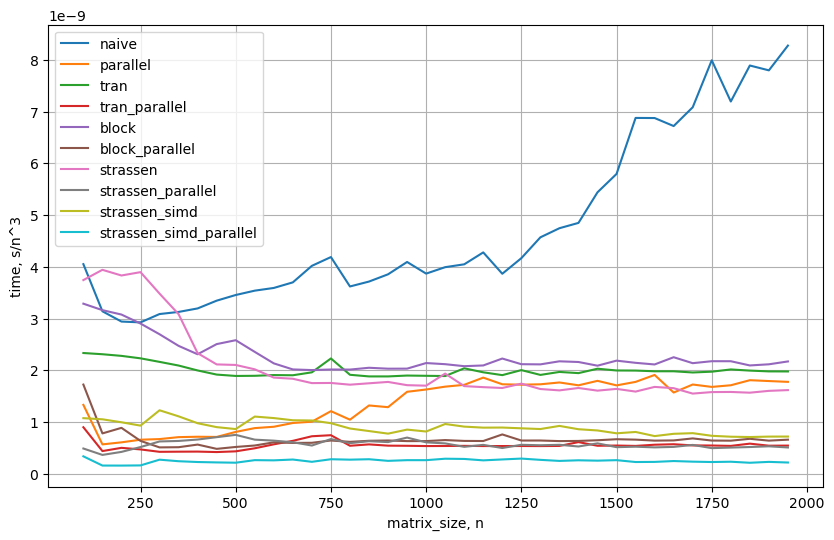

In [3]:
plot_time(range(100, 2000, 50))

Ускорения при размере матрицы 4096, 6 физ. ядер:

In [4]:
N = 4096
times = np.asarray([test_mul(N, functions[name]) for name in functions])
times = times.reshape(-1, 1) / times
pd.DataFrame(times, columns=list(functions.keys()), index=list(functions.keys()))

naive  parallel      tran  tran_parallel     block  \
naive                   1.000000  4.615375  9.605709      33.837132  5.058534   
parallel                0.216667  1.000000  2.081241       7.331393  1.096018   
tran                    0.104105  0.480483  1.000000       3.522607  0.526618   
tran_parallel           0.029553  0.136400  0.283881       1.000000  0.149497   
block                   0.197686  0.912394  1.898911       6.689118  1.000000   
block_parallel          0.051284  0.236697  0.492624       1.735319  0.259424   
strassen                0.082957  0.382876  0.796857       2.807014  0.419639   
strassen_parallel       0.030849  0.142380  0.296328       1.043846  0.156051   
strassen_simd           0.031535  0.145546  0.302916       1.067055  0.159521   
strassen_simd_parallel  0.009681  0.044679  0.092988       0.327562  0.048969   

                        block_parallel   strassen  strassen_parallel  \
naive                        19.499087  12.054495          32.415813   
parallel                      4.224811   2.611812           7.023440   
tran                          2.029948   1.254930           3.374641   
tran_parallel                 0.576263   0.356250           0.957995   
block                         3.854691   2.383001           6.408143   
block_parallel                1.000000   0.618208           1.662427   
strassen                      1.617578   1.000000           2.689106   
strassen_parallel             0.601530   0.371871           1.000000   
strassen_simd                 0.614904   0.380139           1.022234   
strassen_simd_parallel        0.188762   0.116694           0.313803   

                        strassen_simd  strassen_simd_parallel  
naive                       31.710768              103.300027  
parallel                     6.870680               22.381717  
tran                         3.301242               10.754025  
tran_parallel                0.937159                3.052860  
block                        6.268766               20.420940  
block_parallel               1.626269                5.297685  
strassen                     2.630618                8.569420  
strassen_parallel            0.978250                3.186717  
strassen_simd                1.000000                3.257569  
strassen_simd_parallel       0.306977                1.000000